# Insights

1. Salary distribuition According to Race?
2. Which country has high educated People?
3. How many MajorUndergrad Student who gets job?

In [49]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [238]:
# Load Dataset

df = pd.read_csv('survey-results-public.csv')
schema = pd.read_csv('survey-results-schema.csv')

## Data Understanding

In [239]:
# Top Five Data of Survey-Result

df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [240]:
# Rows and Columns

print(f'rows :{df.shape[0]} \ncolumns: {df.shape[1]}')

rows :51392 
columns: 154


In [241]:
# Null Values in dataset

df.loc[:, df.isnull().mean() != 0].isnull().mean()

MajorUndergrad          0.166388
HomeRemote              0.143680
CompanySize             0.242645
CompanyType             0.244571
YearsProgram            0.004806
                          ...   
QuestionsInteresting    0.327989
QuestionsConfusing      0.330265
InterestedAnswers       0.326510
Salary                  0.749163
ExpectedSalary          0.950070
Length: 147, dtype: float64

## Question No 1

### 1. Salary distribuition according to Race?

Race Column Describe **Identification** of Respondent

In [242]:
list(schema[schema.Column == 'Race'].Question)[0]

'Which of the following do you identify as?'

**NaN** Values in Race Columns

In [243]:
df.Race.isnull().mean()

0.3572345890410959

**Droping** NaN Values from Race Columns beacuse <br>
we don't need those records were Race is not avaible

In [244]:
df = df.dropna(subset=['Race'],axis=0)
df.Race.isnull().mean()

0.0

**Understanding** Race Column in dataset

In [245]:
df.Race.unique()

array(['White or of European descent', 'Hispanic or Latino/Latina',
       'Native American, Pacific Islander, or Indigenous Australian; White or of European descent',
       'I prefer not to say', 'South Asian', 'Middle Eastern',
       'Hispanic or Latino/Latina; White or of European descent',
       'I don’t know',
       'Hispanic or Latino/Latina; Native American, Pacific Islander, or Indigenous Australian',
       'Middle Eastern; White or of European descent', 'East Asian',
       'Black or of African descent; White or of European descent',
       'Black or of African descent; East Asian; White or of European descent',
       'Middle Eastern; I don’t know',
       'East Asian; White or of European descent',
       'East Asian; South Asian; I don’t know', 'East Asian; South Asian',
       'Black or of African descent',
       'Native American, Pacific Islander, or Indigenous Australian',
       'Black or of African descent; Middle Eastern',
       'Black or of African descent; Na

As we look Values are **Merged** with each others <br>
We need to split them using **split** function by **;**

In [246]:
# Split Race Data

new_data = df.Race.str.split(';', expand=True)
new_data

,0,1,2,3,4,5,6,7,8
0,White or of European descent,None,None,None,None,None,None,None,None
1,White or of European descent,None,None,None,None,None,None,None,None
2,White or of European descent,None,None,None,None,None,None,None,None
3,White or of European descent,None,None,None,None,None,None,None,None
5,White or of European descent,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...
51386,White or of European descent,None,None,None,None,None,None,None,None
51387,East Asian,White or of European descent,None,None,None,None,None,None,None
51388,Black or of African descent,Hispanic or Latino/Latina,None,None,None,None,None,None,None
51390,White or of European descent,None,None,None,None,None,None,None,None


In [247]:
# Now we need to unpivot this dataaset
new_data = pd.melt(new_data).value.str.strip()
new_data

0         White or of European descent
1         White or of European descent
2         White or of European descent
3         White or of European descent
4         White or of European descent
                      ...             
297292                            None
297293                            None
297294                            None
297295                            None
297296                            None
Name: value, Length: 297297, dtype: object

This **NaN** Values Generate Due to Split <br>
We need to drop this NaN Values <br>
otherwise this will afftect our final result

In [250]:
print(f"Before Removing: {new_data.isnull().mean()}")
new_data = new_data.dropna()
print(f"Before Removing: {new_data.isnull().mean()}")

Before Removing: 0.8830025193661557
Before Removing: 0.0


**Final Result**

In [251]:
race_data = new_data.value_counts()/new_data.shape[0]
race_data = pd.DataFrame(race_data)
race_data

,value
White or of European descent,0.706667
South Asian,0.083259
Hispanic or Latino/Latina,0.053446
East Asian,0.046632
Middle Eastern,0.034011
I prefer not to say,0.025098
Black or of African descent,0.023805
I don’t know,0.018716
"Native American, Pacific Islander, or Indigenous Australian",0.008366


Race **Bar Chart**

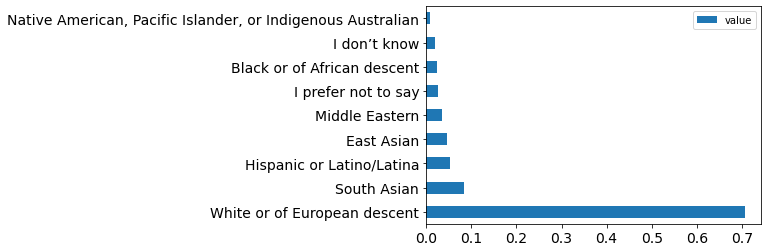

In [254]:
race_data.plot(kind='barh', fontsize=14);

Note: This Bar graph Clearly shows us that **White/European Descent** are highest Responder for this Survey <br>
**Native American, Pacific Islender, or Indigenous Australian** are lowest Responder <br>
This mean mightbe our Result will shows us that white/European Descent have highest paid Because of this baisnes 

Extract Unqiue Values From Race Column

In [252]:
race_col = list(new_data.unique())

As we see most of our respondents are White / European Descent

Calculate Salary of different Races and Took the **median** of it. <br>
**Why Median Not Mean?** <br>
This is becuase almost every salary distribution have outliers, Which will effect Mean <br>
That's why we select Median <br>

In [258]:
def calc_salary(race_col, df):
    '''
    INPUT - race_col - list - Desired column 
            df - dataframe
    OUTPUT - 
            desc - dataframe which contain Salary's median and Race
    '''
    
    data = df.copy()
    data = data.dropna(subset=['Race'], axis=0)
    c=1
    for col in race_col:
        
        # Calculate Median and add into Salary (median Column)
        race_data.loc[col, 'Salary (median)'] += data[data.Race.str.contains(col)].Salary.median()
        
        # Histogram Plotting
        plt.subplot(3,3,c)
        plt.tight_layout()
        data[data.Race.str.contains(col)].Salary.plot(kind='hist')
        plt.title(col)\
        
        c+=1
        
    # Rename first Column
    race_data.columns =['Respondents','Salary (median)']
    
    return race_data.sort_values(ascending=False, by='Salary (median)')

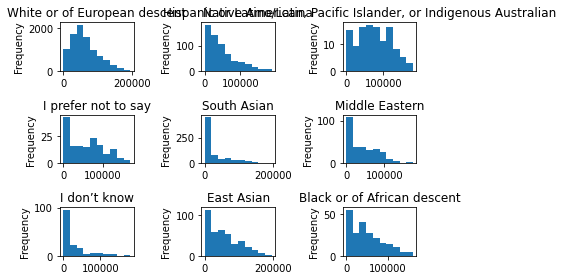

In [259]:
race_data['Salary (median)'] = 0
race_data = calc_salary(race_col, df)

Histograms shows us that **Native American, Pacific Islender, or Indigenous Australian** will dominate all others <br>
Because there are more highest paid employee than others

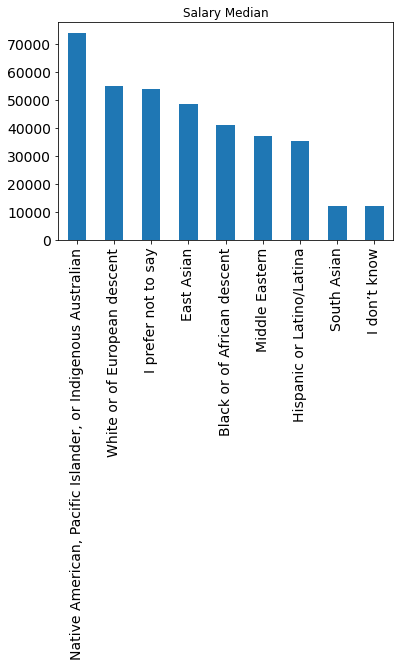

In [260]:
race_data['Salary (median)'].plot(kind='bar', fontsize=14)
plt.title('Salary Median')
plt.show()

#### Conclusion

**Native American, Pacific Islender, or Indigenous Australian** are highest paid and <br>
**South Asian** are lowest paid

Intersting part is that White/European descent were higher responder but they gets second position
and South Asian were second highest responder and they gets second last position

## Question No 2

### Which country has highest educated People?

**Data Understanding**

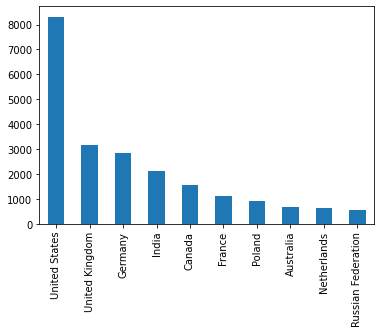

In [262]:
# Top Ten Countries Those people have highest Repond

df.Country.value_counts()[:10].plot(kind='bar');

In [263]:
def find_max_min(colNo1, colNo2, df, find='max'):
    
    '''
    INPUT - colNo1 - String - 1st Column name you want to groupby 
            colNo2 - String - 2nd Column name you want to groupby 
            df - dataframe
            find - String - max means find Maximum value, min means find minimum value
    OUTPUT - 
            desc - dataframe which calculate count of colNo1 and ColNo2
    '''
    
    
    # Apply Group by on colNo1 and colNo2 on df dataset
    data = pd.DataFrame(df.groupby([colNo1, colNo2]).count()['Respondent'])
    
    # Extract Values from two Columns
    cols2 = list(data.reset_index()[colNo1].unique())
    cols1 = list(data.reset_index()[colNo2].unique())
    
    # Dict Which will save Final result
    result = {}
    
    # User Select If it want ot fin min or max using parameter find=''
    # If User puts wrong parameter it raise an exception
    if find == 'max':
        value = -math.inf
        func = func_max
    elif find == 'min':
        value = math.inf
        func = func_min
    else:
        raise Exception("Sorry, Please Enter only min or max")
    
    # Use to save index
    index = ''

    for col1 in cols1:
        for col2 in cols2:
            nested_val = data.loc[col2, :]
            try:
                val = int(nested_val.loc[col1,:])
                value, index = func(value, val, col2)
            except:
                pass
        
        # Save result on Dict
        result[col1] =  [index, value]
        
        # Reset Values
        value = -math.inf if find == 'max' else math.inf
        index = ''
    
    # Transform result matrix
    final = pd.DataFrame(result).T
    # Rename Column 
    final.columns = [colNo1,colNo2]
    
    return final

# Helper Funvtion
def func_max(value, val, col2):
    if val > value:
        value = val
        index = col2
    return value, index
    
def func_min(value, val, col2):
    if val < value:
        value = val
        index = col2
    return value, index

In [264]:
highest_edu = find_max_min('Country', 'FormalEducation', df, 'max')
highest_edu

,Country,FormalEducation
Bachelor's degree,United States,4301
I never completed any formal education,United States,32
Master's degree,United States,1349
Primary/elementary school,United States,166
Secondary school,Germany,627
Some college/university study without earning a bachelor's degree,United States,1614
Doctoral degree,United States,251
I prefer not to answer,United States,75
Professional degree,Spain,51


#### Conclusion

This Result Shows that US has Most Bachelor's , Masters and Doctoral Degress <br>
This can be justidy beacause we have largest responder from US (Baisnes in dataset)<br>
But we have Secondry School responder from Germany <br>
and professional Degree from Spain

## Question No 3

### How many MajorUndergrad Student who gets job and Not?

In [266]:
# Copying Dataset to dfnew

dfnew = df.loc[:,['EmploymentStatus','MajorUndergrad']].copy()

In [267]:
df.EmploymentStatus.value_counts()

Employed full-time                                      23996
Independent contractor, freelancer, or self-employed     3543
Employed part-time                                       1978
Not employed, but looking for work                       1541
Not employed, and not looking for work                   1496
I prefer not to say                                       377
Retired                                                   102
Name: EmploymentStatus, dtype: int64

Extract Those undergrad who are employed

In [179]:
employed = ['Employed part-time','Employed full-time','Independent contractor, freelancer, or self-employed']
emp = 0
for val in employed: 
    emp += dfnew[dfnew.EmploymentStatus == val].count()['MajorUndergrad']
    
print(f"Undergrad Student those are Employed: {emp/dfnew.MajorUndergrad.shape[0] * 100} %")

Undergrad Student those are Employed: 77.19489414694894 %


Extract Those undergrad who are not employed

In [180]:
employed = ['Not employed, and not looking for work', 'Not employed, but looking for work']
emp = 0
for val in employed: 
    emp += dfnew[dfnew.EmploymentStatus == val].count()['MajorUndergrad']
    
print(f"Undergrad Student those are Not Employed: {emp/dfnew.MajorUndergrad.shape[0] * 100} %")

Undergrad Student those are Not Employed: 5.199252801992528 %


#### Conlcusion

around 77% Undergrad are Employed <br>
around 5% Undergrad are not employed <br>
remaing 18% Don't want to respond or reitred